In [1]:
import math
import gzip
import random
import string
import numpy as np
from tqdm.notebook import tqdm 

In [2]:
import sklearn

#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier # Linear Regression with Regularization support
from sklearn.linear_model import LogisticRegressionCV # Logistic regression with cross validation generated using stratified K-folds

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
#data preprocessing (using numpy inputs)
#scaling
data = np.array([[1, 2], [-1, 3], [0, 6]])
print("--------data--------")
print(data)
#standardized scaling
from sklearn.preprocessing import scale
col_standardized = scale(data) #scale each column
col_means = col_standardized.mean(axis=0).round(decimals=3) # Column means (rounded to nearest thousandth)
col_stds = col_standardized.std(axis=0) # Column standard deviations
print("--------standardized scaling--------")
print(col_standardized)
#range scaling
from sklearn.preprocessing import MinMaxScaler
default_scaler = MinMaxScaler() # the default range is [0,1]
transformed = default_scaler.fit_transform(data)
print("--------range scaling--------")
print(transformed)
custom_scaler = MinMaxScaler(feature_range=(-2, 3))
transformed = custom_scaler.fit_transform(data)
print(transformed)

#robust scaling -- to avoid effect of outlier on scaling
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler() #uses interquartile range
transformed = robust_scaler.fit_transform(data)
print("--------robust scaling--------")
print(transformed)

#L2 normalization
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
transformed = normalizer.fit_transform(data) #divides each entry by the columns normalized score
print("--------L2 normalization--------")
print(transformed)

#data imputation -- strategies: mean, median, mode, constant 
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer() #default=mean
transformed = imp_mean.fit_transform(data)
print("--------data imputation--------")
print(transformed)

imp_median = SimpleImputer(strategy='median')
imp_frequent = SimpleImputer(strategy='most_frequent')
imp_constant = SimpleImputer(strategy='constant',fill_value=-1)

#advacned imputation - using k-nearest neighbours, MICE(multiple chained imputations)

data = np.array([[1, 2, 3], [-1, 3, 5], [0, 6, 9], [-1, 8, 13]])
print("--------data--------")
print(data)
#PCA
from sklearn.decomposition import PCA
pca_obj = PCA() # The value of n_component will be m-1. As features are m and default is always m-1
pc = pca_obj.fit_transform(data).round(3)
print("--------PCA--------")
print(pc)
pca_obj = PCA(n_components=3)
pc = pca_obj.fit_transform(data).round(3)
print(pc)

#splitting data
print("--------splitting data--------")
data = np.random.rand(1000, 10)
labels = np.random.randint(2, size=1000)
print("data shape:", data.shape, " labels shape:", labels.shape)
from sklearn.model_selection import train_test_split
split_dataset = train_test_split(data, labels) #default train = 0.75, test = 0.25
print("train data:", split_dataset[0].shape, " labels:", split_dataset[2].shape)
print("test data:", split_dataset[1].shape, " labels:", split_dataset[3].shape)
split_dataset = train_test_split(data, labels, test_size=0.375) #specify test size
print("train data:", split_dataset[0].shape, " labels:", split_dataset[2].shape)
print("test data:", split_dataset[1].shape, " labels:", split_dataset[3].shape)

X_train, X_test, y_train, y_test = split_dataset

--------data--------
[[ 1  2]
 [-1  3]
 [ 0  6]]
--------standardized scaling--------
[[ 1.22474487 -0.98058068]
 [-1.22474487 -0.39223227]
 [ 0.          1.37281295]]
--------range scaling--------
[[1.   0.  ]
 [0.   0.25]
 [0.5  1.  ]]
[[ 3.   -2.  ]
 [-2.   -0.75]
 [ 0.5   3.  ]]
--------robust scaling--------
[[ 1.  -0.5]
 [-1.   0. ]
 [ 0.   1.5]]
--------L2 normalization--------
[[ 0.4472136   0.89442719]
 [-0.31622777  0.9486833 ]
 [ 0.          1.        ]]
--------data imputation--------
[[ 1.  2.]
 [-1.  3.]
 [ 0.  6.]]
--------data--------
[[ 1  2  3]
 [-1  3  5]
 [ 0  6  9]
 [-1  8 13]]
--------PCA--------
[[-5.377 -0.671 -0.097]
 [-2.949  1.086  0.033]
 [ 1.895 -0.499  0.182]
 [ 6.431  0.084 -0.119]]
[[-5.377 -0.671 -0.097]
 [-2.949  1.086  0.033]
 [ 1.895 -0.499  0.182]
 [ 6.431  0.084 -0.119]]
--------splitting data--------
data shape: (1000, 10)  labels shape: (1000,)
train data: (750, 10)  labels: (750,)
test data: (250, 10)  labels: (250,)
train data: (625, 10)  label

##### Models

In [4]:
#linear regression
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


predictions = reg.predict(X_test)
reg.coef_ #to get coefficients
reg.intercept_ # to get bias term
r2 = reg.score(X_train, y_train) #gives R^2 metric

#ridge regression (regularized linear regression -- uses L2 norm for regularization)
reg = linear_model.Ridge(alpha=0.1)
reg.fit(X_train, y_train)
r2 = reg.score(X_train, y_train) #gives R^2 metric

#using ridgeCV to tune hyperparamter alpha with cross validation
reg = linear_model.RidgeCV(alphas=[0.1, 0.01, 0.3, 0.2])
reg.fit(X_train, y_train)
reg.alpha_ #chosen alpha

#lasso regression (sparse linear regression -- uses L1 norm for regularization)
reg = linear_model.Lasso(alpha=0.1)
reg.fit(data, labels)
r2 = reg.score(X_train, y_train) #gives R^2 metric

#using lassoCV to tune hyperparamter alpha with cross validation
reg = linear_model.LassoCV(alphas=[0.1, 0.01, 0.3, 0.2])
reg.fit(X_train, y_train)
reg.alpha_ #chosen alpha

#Bayesian ridge regression -- uses gamma distribution
reg = linear_model.BayesianRidge()
reg.fit(data, labels)
reg.alpha_ #default 10^-6
reg.lambda_ #default 10^-6


#logistic regression classifies data based on logits
reg = linear_model.LogisticRegression() #default setting for LogisticRegression is binary classification
reg.fit(data, labels)

#multinomial logistic regression
reg = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200, penalty='l2') #default multiclass = ovr (one vs rest)
reg.fit(data, labels)

#logistic regression cross validated
reg = linear_model.LogisticRegressionCV(solver='lbfgs', max_iter=1000)

#one vs rest classifier using k neighbours classification
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

#decision trees 
from sklearn import tree
clf_tree1 = tree.DecisionTreeClassifier() #for classification -- uses Gini impurity to split
reg_tree1 = tree.DecisionTreeRegressor() #for regression -- uses MSE/MAE to split
clf_tree2 = tree.DecisionTreeClassifier(max_depth=8)  # max depth of 8 -- set depth to avoid overfitting
reg_tree2 = tree.DecisionTreeRegressor(max_depth=5)  # max depth of 5
clf_tree1.fit(data, labels)

DecisionTreeClassifier()

In [5]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
clf = linear_model.LogisticRegression(max_iter=3000)
cv_score = cross_val_score(clf, data, labels, cv=3)  # k = 3

In [6]:
#evaluating models
from sklearn import metrics
r2 = metrics.r2_score(y_test, prediction) #for linear reg
mse = metrics.mean_squared_error(y_test, prediction) #for linear reg
mae = metrics.mean_absolute_error(y_test, prediction) #for linear reg
acc = metrics.accuracy_score(y_test, prediction) #for classification

In [7]:
#exhaustive tuning using grid search CV
reg = linear_model.BayesianRidge()
params = {
  'alpha_1':[0.1,0.2,0.3],
  'alpha_2':[0.1,0.2,0.3]
}
reg_cv = GridSearchCV(reg, params, cv=5)
reg_cv.fit(X_train, y_train)
reg_cv.best_params_ #gives the best params

{'alpha_1': 0.1, 'alpha_2': 0.1}

In [8]:
#clustering
data = np.array([[1,1,0,1,1], [0,1,0,1,1], [1,0,0,1,1], [0,1,0,0,1]])
data1 = np.array([[1,1,0,1,1], [0,1,0,1,1]])
data2 = np.array([[1,0,0,1,1], [0,1,0,0,1], [1,0,1,1,0]])

#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_sims = cosine_similarity(data) #calculates cosine similarity between all comination of vectors and puts it into a n*n matrix
cos_sims = cosine_similarity(data1, data2) #all comnbination of vectors from data1 and data2 -> n*m matrix 
print(cos_sims)


[[0.8660254  0.70710678 0.57735027]
 [0.66666667 0.81649658 0.33333333]]


In [9]:
#clustering
data = np.array([[1,1,0,1,1], [0,1,0,1,1], [1,0,0,1,1], [0,1,0,0,1], [0,0,0,0,1], [0,1,0,0,0], [0,0,0,0,0]])
data1 = np.array([[1,1,0,1,1], [0,1,0,1,1]])
data2 = np.array([[1,0,0,1,1], [0,1,0,0,1], [1,0,1,1,0]])
new_obs = np.array([[1,1,1,1,1]])

#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_sims = cosine_similarity(data) #calculates cosine similarity between all comination of vectors and puts it into a n*n matrix
cos_sims = cosine_similarity(data1, data2) #all comnbination of vectors from data1 and data2 -> n*m matrix 

#k-nearest neighbours
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors() #default k=5
nbrs.fit(data)
dists, knbrs = nbrs.kneighbors(new_obs)

nbrs = NearestNeighbors(n_neighbors=2) #specify k

#k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
kmeans.labels_ #get labels for each entry
kmeans.cluster_centers_ #get cluster centers
pred_labels = kmeans.predict(new_obs)

#mini-batch k-means clustering (as k-means on large data is slow, also quality diff is negligible)
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, batch_size=10)
kmeans.fit(data)
kmeans.labels_ #get labels for each entry
kmeans.cluster_centers_ #get cluster centers
pred_labels = kmeans.predict(new_obs)

#hierarchical clustering (Agglomerative/Top down)
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)

#meanshift clustering
from sklearn.cluster import MeanShift
mean_shift = MeanShift()
mean_shift.fit(data)
mean_shift.labels_
mean_shift.cluster_centers_
pred_labels = mean_shift.predict(new_obs)
                
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=30) 
dbscan.fit(data)
dbscan.labels_
dbscan.core_sample_indices_



array([], dtype=int64)

In [10]:
#Evaluating clusters
true_labels = np.array([0])
#adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(pred_labels, true_labels)

#adjusted mutual information
from sklearn.metrics import adjusted_mutual_info_score
ami = adjusted_mutual_info_score(pred_labels, true_labels)

In [11]:
#Feature clutsering using feature agglomeration -- helps in feature dimentionality reduction
from sklearn.cluster import FeatureAgglomeration
agg = FeatureAgglomeration(n_clusters=2)
new_data = agg.fit_transform(data)

### Using XGBoost Library

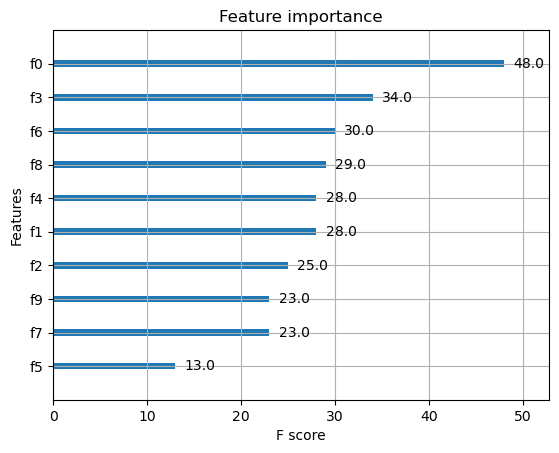

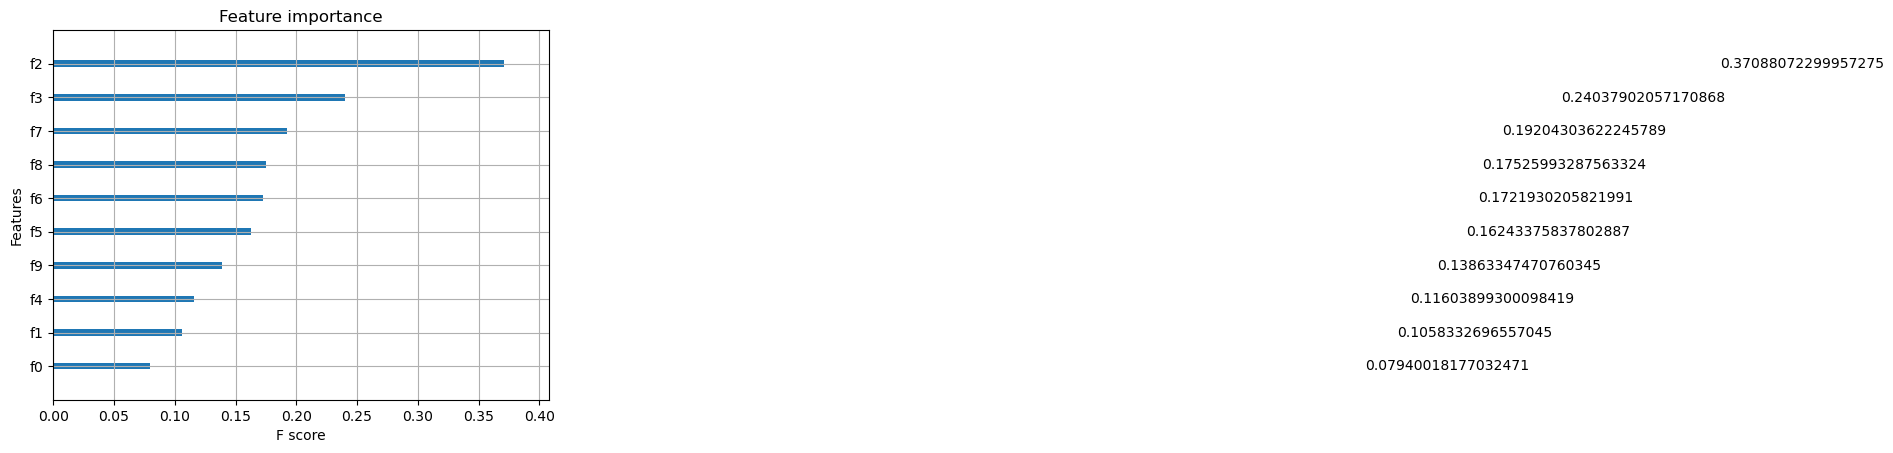

{'eval_metric': 'logloss', 'max_depth': 10, 'objective': 'binary:logistic'}

In [12]:
import xgboost as xgb

#classification
data = np.random.rand(100,10)
labels = np.random.randint(2, size=100)
new_data = np.random.rand(2,10)
new_labels = np.array([0, 1])

dmat1 = xgb.DMatrix(data, label=labels)
deval = xgb.DMatrix(new_data, label=new_labels)

params = {
  'max_depth': 10, 
  'objective': 'binary:logistic',
  'eval_metric':'logloss'
}
bst = xgb.train(params, dmat1)  # booster
bst.eval(deval) # evaluation

dpred = xgb.DMatrix(new_data)
predictions = bst.predict(dpred)


#use xgboost cross validation
cv_results = xgb.cv(params, dmat1) #o/p is pandas DataFrame

#set number of boosting iterations
cv_results = xgb.cv(params, dmat1, num_boost_round=5)


#save model
bst.save_model('model.bin')

#load model
new_bst = xgb.Booster()
new_bst.load_model('model.bin')

#warapper to make the model similar to scikit learn
model = xgb.XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False, num_class=2)
model.fit(data, labels)
predictions = model.predict(new_data) #returns actualk values and not predictions like in xcb.cv

#regressor model
model = xgb.XGBRegressor(max_depth=2)
model.fit(data, labels)
predictions = model.predict(new_data)

#get feature importance of each feature in model
model.feature_importances_

#plot important features
import matplotlib.pyplot as plt
xgb.plot_importance(model) 
plt.show() # matplotlib plot - bar graph of F1-scores for each feature

xgb.plot_importance(model, importance_type='gain') #default importance_type=weight
plt.show() 

#use grid search cv to tune hyperparameters
params = {
  'max_depth': [5, 10], 
  'objective': ['binary:logistic'],
  'eval_metric':['logloss']
}


cv_model = GridSearchCV(model, params, cv=4)
cv_model.fit(data, labels)
cv_model.best_params_

###### TL;DR NLP

In [13]:
docs = [
       "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
       "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
       "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)"
      ]
text = [
        "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
]

In [14]:
#TF-IDF implementation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#create a vocabulary of words, 
cv=CountVectorizer(max_df=0.95,         # ignore words that appear in 95% of documents
                   max_features=10000,  # the size of the vocabulary
                   ngram_range=(1,3)    # vocabulary contains single words, bigrams, trigrams
                  )
word_count_matrix=cv.fit_transform(docs)

#create the transformer using word_count_matrix from CountVectorizer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_matrix)

#for a random piece of text
tf_idf_vec = tfidf_transformer.transform(cv.transform(text))

In [15]:
#use TfidfVectorizer to directly create a feature matrix
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer=tokenizer_porter, use_idf=True, norm='l2', smooth_idf=True)


X=tfidf.fit_transform(text)